In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import  linear_model

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'Price (USD)')

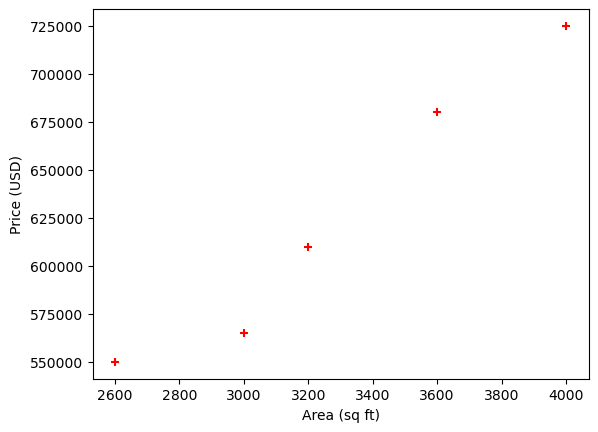

In [3]:
%matplotlib inline
plt.scatter(df.area, df.price, color='red', marker='+', label='Data Points')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (USD)')

In [26]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)
print("Co-efficient: " , reg.coef_)
print("Intercept: ", reg.intercept_)
# plt.plot(df.area, reg.predict(df[['area']]), color='blue', label='Regression Line')

Co-efficient:  [135.78767123]
Intercept:  180616.43835616432


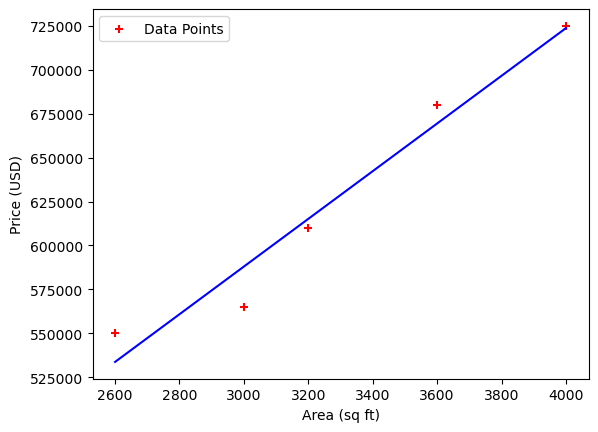

In [27]:
plt.scatter(df.area, df.price, color='red', marker='+', label='Data Points')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (USD)')
plt.legend(['Data Points', 'Regression Line'])
plt.plot(df.area, reg.predict(df[['area']]), color='blue' , label='Regression Line')

In [28]:
reg.predict([[3300]])

c:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [7]:
d = pd.read_csv('areas.csv')
d.head(3)

,area
0,1000
1,1500
2,2300


In [8]:
p = reg.predict(d)

In [9]:
d['predicted_price'] = p
d.to_csv('predicted_prices.csv', index=False) #creating a new CSV file with predictions

In [10]:
mdf = pd.read_csv('homeprices_mv.csv')
mdf['bedrooms'].fillna(mdf['bedrooms'].mean(), inplace=True)  # Filling missing values with mean
mdf['bedrooms']


C:\Users\AMIT HASSAN JOY\AppData\Local\Temp\ipykernel_17648\412741918.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mdf['bedrooms'].fillna(mdf['bedrooms'].mean(), inplace=True)  # Filling missing values with mean


0    3.0
1    4.0
2    4.2
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [12]:
mvreg = linear_model.LinearRegression()
mvreg.fit(mdf[['area', 'bedrooms' ,'age']], mdf.price)
print(mvreg.coef_)
print(mvreg.intercept_)

[  116.66950551 18756.28806982 -3675.75111708]
231586.00639409182


In [13]:
mvreg.predict([[3300, 3, 40]])  # Predicting price for a house with area 3300 sq ft, 3 bedrooms, and age 40 years

c:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([525834.19408919])

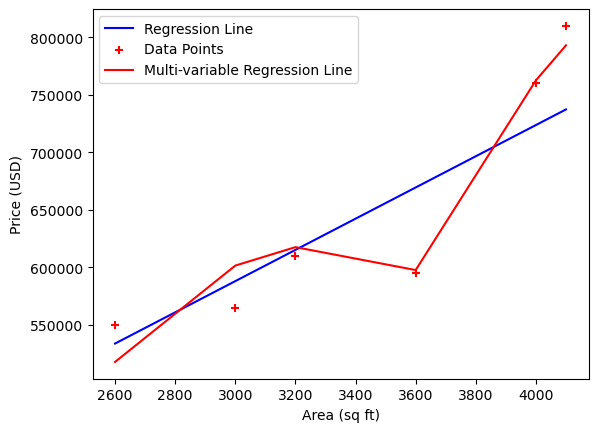

In [14]:
plt.plot(mdf.area, reg.predict(mdf[['area']]), color='blue', label='Regression Line')
plt.scatter(mdf.area, mdf.price, color='red', marker='+', label='Data Points') 
plt.plot(mdf.area, mvreg.predict(mdf[['area', 'bedrooms', 'age']]), color='red', label='Multi-variable Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (USD)')
plt.legend(['Regression Line', 'Data Points', 'Multi-variable Regression Line'])


In [15]:
from word2number import w2n
x = w2n.word_to_num('twenty three')
x

23

In [ ]:
import pickle 
# use to make a binary file containing model so that
# we can use it later without retraining

In [30]:
with open('model_pickle','wb') as f:
    pickle.dump(reg, f)

In [31]:
with open('model_pickle','rb') as f:
    model = pickle.load(f)

In [32]:
model.predict([[5000]])

c:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [ ]:
# Doing the same with joblib, which is more efficient for large numpy arrays
import joblib
joblib.dump(reg, 'model_joblib.pkl')

['model_joblib.pkl']

In [39]:
model_joblib = joblib.load('model_joblib.pkl')
model_joblib.predict([[5000]])
# Saving the multi-variable regression model
print(model_joblib.coef_)
print(model_joblib.intercept_)

[135.78767123]
180616.43835616432


c:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
